In [1]:
## Assignment 1 - Support Vector Machines
# Willie Sine
# CPSC 393
# wsine@chapman.edu
# 2371198

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [3]:
# Iris DF, null values dropped
df = pd.read_csv("iris-1.csv")
df = df.dropna()
df.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Not-Iris-setosa
146,147,6.3,2.5,5.0,1.9,Not-Iris-setosa
147,148,6.5,3.0,5.2,2.0,Not-Iris-setosa
148,149,6.2,3.4,5.4,2.3,Not-Iris-setosa
149,150,5.9,3.0,5.1,1.8,Not-Iris-setosa


In [4]:
# separation/declaration of features
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

X = df[features]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 24)

z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)



In [5]:
# GridSearch
param_grid = {'C':[0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001],
             'kernel': ['rbf','poly','sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True, verbose = 2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [6]:
print(grid.best_estimator_)


SVC(C=0.1, gamma=1, kernel='poly')


In [7]:
# CV for degree of kernalization
degs = [2,3,4,5,6]
CV = []

for d in degs:
    CV_kern_deg = svm.SVC(C = 0.1, kernel = 'poly', degree = d)
    CV_kern_deg.fit(X_train,y_train)
    y_pred = CV_kern_deg.predict(X_test)
    CV.append(accuracy_score(y_test,y_pred))
    


In [14]:
CV

[0.8222222222222222,
 1.0,
 0.8666666666666667,
 0.9777777777777777,
 0.8666666666666667]

In [15]:
# FINAL MODEL

iris_SVM = svm.SVC(C=0.1,kernel='poly',degree = 3)
iris_SVM.fit(X_train,y_train)
y_pred = iris_SVM.predict(X_test)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Not-Iris-setosa       1.00      1.00      1.00        30

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



/Users/williesine/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


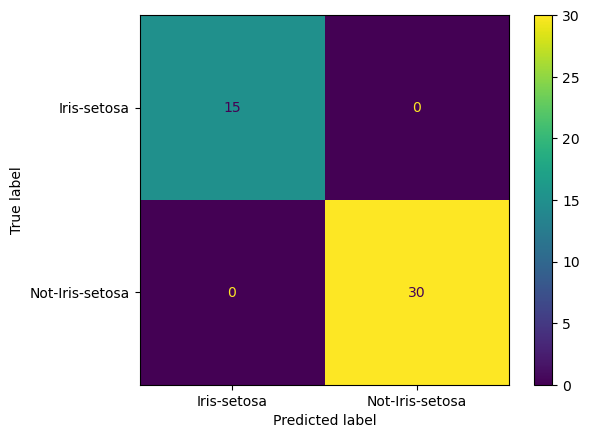

In [16]:
#Performance Metrics
plot_confusion_matrix(iris_SVM,X_test,y_test)
print(classification_report(y_test,y_pred))


In [17]:

# # https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
# X_viz = df[['SepalLengthCm', 'SepalWidthCm']]
# y_viz = df['Species']
# def make_meshgrid(x,y,h=0.02):
#     x_min, x_max = x.min() -1, x.max() + 1
#     y_min, y_max = y.min() -1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min,y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     zed = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     zed = zed.reshape(xx.shape)
#     out = ax.countourf(xx, yy, zed, **params)
#     return out

# model = svm.SVC(C=0.1,kernel='poly',degree = 4)
# clf = model.fit(X_viz,y_viz)

# fig, ax = plt.subplots()
# title = ("Decision Boundary of Polynomial SVC")
# X0 = df['SepalLengthCm']
# X1 = df["SepalWidthCm"]

# xx, yy = make_meshgrid(X0,X1)

# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha = 0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s = 20, edgecolors = 'k')
# ax.set_ylabel('y lab')
# ax.set_xlabel('x lab')
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# ax.legend()
# plt.show()

# Wasn't able to get the plot display the decision boundaries
# But the scatter plots visualize the validity of my model's outputs


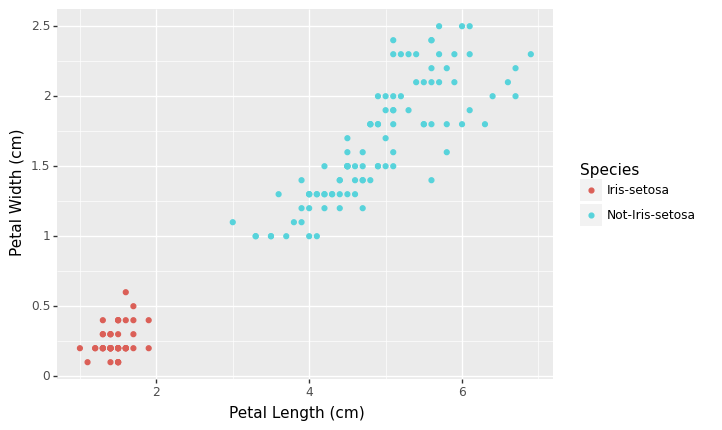

<ggplot: (8780130741191)>

In [12]:
ggplot(df, aes(x = "PetalLengthCm", y = "PetalWidthCm", color = "Species")) + geom_point() + xlab("Petal Length (cm)") + ylab("Petal Width (cm)")


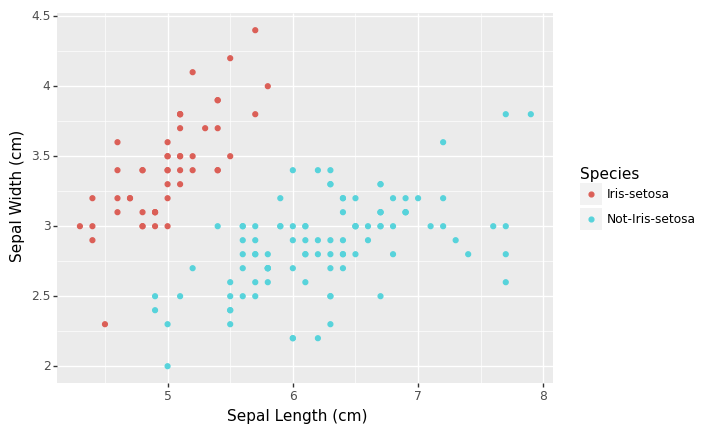

<ggplot: (8780124164545)>

In [13]:
ggplot(df, aes(x = "SepalLengthCm", y = "SepalWidthCm", color = "Species")) + geom_point() + xlab("Sepal Length (cm)") + ylab("Sepal Width (cm)")
